# Table of Contents
 <p><div class="lev1 toc-item"><a href="#Boltzmann" data-toc-modified-id="Boltzmann-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Boltzmann</a></div><div class="lev2 toc-item"><a href="#Pentose-phosphate-+-Glycolysis-+-TCA-cycle" data-toc-modified-id="Pentose-phosphate-+-Glycolysis-+-TCA-cycle-11"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Pentose phosphate + Glycolysis + TCA cycle</a></div><div class="lev2 toc-item"><a href="#Regulation" data-toc-modified-id="Regulation-12"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Regulation</a></div><div class="lev2 toc-item"><a href="#Turning-on-Regulation-and-Setting-Enzyme-Levels" data-toc-modified-id="Turning-on-Regulation-and-Setting-Enzyme-Levels-13"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Turning on Regulation and Setting Enzyme Levels</a></div><div class="lev1 toc-item"><a href="#Models-and-Simulations" data-toc-modified-id="Models-and-Simulations-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Models and Simulations</a></div><div class="lev2 toc-item"><a href="#Model-With-Regulation" data-toc-modified-id="Model-With-Regulation-21"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Model With Regulation</a></div><div class="lev3 toc-item"><a href="#Run-Deterministic-Simulation" data-toc-modified-id="Run-Deterministic-Simulation-211"><span class="toc-item-num">2.1.1&nbsp;&nbsp;</span>Run Deterministic Simulation</a></div><div class="lev3 toc-item"><a href="#Derivatives-from-ODE-thermodynamic-optimization-simulation" data-toc-modified-id="Derivatives-from-ODE-thermodynamic-optimization-simulation-212"><span class="toc-item-num">2.1.2&nbsp;&nbsp;</span>Derivatives from ODE thermodynamic optimization simulation</a></div><div class="lev3 toc-item"><a href="#Find-Active-and-Variable-Metabolites" data-toc-modified-id="Find-Active-and-Variable-Metabolites-213"><span class="toc-item-num">2.1.3&nbsp;&nbsp;</span>Find Active and Variable Metabolites</a></div><div class="lev3 toc-item"><a href="#Activity-scaled-Odds-of-Reaction-from-Deterministic-Simulation" data-toc-modified-id="Activity-scaled-Odds-of-Reaction-from-Deterministic-Simulation-214"><span class="toc-item-num">2.1.4&nbsp;&nbsp;</span>Activity-scaled Odds of Reaction from Deterministic Simulation</a></div><div class="lev3 toc-item"><a href="#Analyze-Metabolite-Levels-from-Deterministic-Simulation" data-toc-modified-id="Analyze-Metabolite-Levels-from-Deterministic-Simulation-215"><span class="toc-item-num">2.1.5&nbsp;&nbsp;</span>Analyze Metabolite Levels from Deterministic Simulation</a></div><div class="lev2 toc-item"><a href="#Infer-Regulated-Reactions" data-toc-modified-id="Infer-Regulated-Reactions-22"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Infer Regulated Reactions</a></div><div class="lev2 toc-item"><a href="#Calculate-Rate-Constants" data-toc-modified-id="Calculate-Rate-Constants-23"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Calculate Rate Constants</a></div><div class="lev3 toc-item"><a href="#Equalize-reaction-probabilities" data-toc-modified-id="Equalize-reaction-probabilities-231"><span class="toc-item-num">2.3.1&nbsp;&nbsp;</span>Equalize reaction probabilities</a></div><div class="lev3 toc-item"><a href="#Calculate-the-Unregulated-Thermodynamic-likelihood-of-the-reactions" data-toc-modified-id="Calculate-the-Unregulated-Thermodynamic-likelihood-of-the-reactions-232"><span class="toc-item-num">2.3.2&nbsp;&nbsp;</span>Calculate the Unregulated Thermodynamic likelihood of the reactions</a></div><div class="lev3 toc-item"><a href="#Calculate-Rate-Constants/Parameters" data-toc-modified-id="Calculate-Rate-Constants/Parameters-233"><span class="toc-item-num">2.3.3&nbsp;&nbsp;</span>Calculate Rate Constants/Parameters</a></div><div class="lev3 toc-item"><a href="#Cutoff-for-time-derivative-of-concentrations" data-toc-modified-id="Cutoff-for-time-derivative-of-concentrations-234"><span class="toc-item-num">2.3.4&nbsp;&nbsp;</span>Cutoff for time derivative of concentrations</a></div>

In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import subprocess
import re
import os
from IPython.core.display import display
pd.set_option('display.max_columns', None,'display.max_rows', None)
%matplotlib inline
N_avogadro = 6.022140857e+23
VolCell = 1.0e-15
Concentration2Count = N_avogadro * VolCell
concentration_increment = 1/(N_avogadro*VolCell)

Change directories to where the simulation data is:

In [57]:
# Uncomment to change to your directory, if needed:
cwd = os.getcwd()
mydir = cwd+'/simulation_data'
if 'simulation_data' not in mydir: 
  os.chdir(mydir)

# Boltzmann
A beta version of the simulation code is available on GitHub at https://github.com/PNNL-CompBio/Boltzmann.
## Pentose phosphate + Glycolysis + TCA cycle
Reactions:

In [58]:
cat neurospora_pentose_phos.glycolysis.tca.2.dat

REACTION ME1m
LEFT	(S)-MALATE + NAD+ 
RIGHT	pyruvate + NADH + CO2
LEFT_COMPARTMENT MITOCHONDRIA
RIGHT_COMPARTMENT MITOCHONDRIA
ENZYME_LEVEL	0.0
//
REACTION ME2m
LEFT    (S)-MALATE + NADP+
RIGHT   PYRUVATE + NADPH + CO2
LEFT_COMPARTMENT MITOCHONDRIA
RIGHT_COMPARTMENT MITOCHONDRIA
ENZYME_LEVEL	0.0
//
REACTION CSm
LEFT	OXALOACETATE + ACETYL-COA + H2O
RIGHT	CITRATE + COA
LEFT_COMPARTMENT MITOCHONDRIA
RIGHT_COMPARTMENT MITOCHONDRIA
COMMENT	PH = 7.0, IONIC STRENGTH = 0.15 M 
//
REACTION ACONTm
LEFT	CITRATE
RIGHT	ISOCITRATE
LEFT_COMPARTMENT MITOCHONDRIA
RIGHT_COMPARTMENT MITOCHONDRIA
COMMENT	 PH = 7.0, IONIC STRENGTH = 0.15 M 
COMMENT DOn't split into two reactions if max entropy is being used - only one enzyme needs to be epressed
//
REACTION ICDHxm
LEFT	ISOCITRATE + NAD+
RIGHT	2-OXOGLUTARATE + NADH + CO2
LEFT_COMPARTMENT MITOCHONDRIA
RIGHT_COMPARTMENT MITOCHONDRIA
COMMENT	PH = 7.0, IONIC STRENGTH = 0.15 M
//
REACTION AKGDm
LEFT	2-OXOGLUTARATE + COA + NAD+
RIGHT	SUCCINYL-COA + CO2 + NADH
LEF

Boltzmann Input File:

In [77]:
cat neurospora_pentose_phos.glycolysis.tca_reg.in

RXN_FILE neurospora_pentose_phos.glycolysis.tca.2.dat
INIT_FILE neurospora_pentose_phos.glycolysis.tca.2_reg.rstrt
INIT_FILE yeast_centralMetab_concs2.in 
INIT_FILE neurospora_pentose_phos.glycolysis.tca.2_reg.rstrt
INIT_FILE neurospora_pentose_phos.glycolysis.tca.2_reg_concs.in
LOG_FILE neurospora_pentose_phos.glycolysis.tca.2_reg.log
OUT_FILE neurospora_pentose_phos.glycolysis.tca.2_reg.out
USE_DEQ 1
NO_ROUND_FROM_DEQ 1
ODE_T_FINAL 10000000
ODE_RXN_VIEW_FREQ 1000
DELTA_CONCS_CHOICE 13
DELTA_CONCS_CHOICE 7
DERIV_THRESH  5.0e-17
WARMUP_STEPS 00000000
RECORD_STEPS 000000
TEMP_KELVIN 298.15
PH 7.0
IONIC_STRENGTH 0.15
PRINT_OUTPUT 2
CONCS_OR_COUNTS 3
RXN_VIEW_FREQ 100
COUNT_VIEW_FREQ 100
LKLHD_VIEW_FREQ 100
USE_BULK_WATER 1
USE_REGULATION 1
USE_ENZYME_LEVELS 1
USE_PSEUDOISOMERS 1
USE_DGZERO 1
USE_ACTIVITIES 1
NUM_METABOLIC_GROUPS 1



## Regulation
Notice that in the PDH reaction there is a line:

NREGULATION ACETYL-COA 1.00e-03 20.0

The keyword NREGULATION is for negative regulation using a Hill Function with constant = 6.1e-04 and an exponent of 20.0
$$Activity = \frac{K^{n}}{K^{n} + X^{n}}$$

where K is the constant similar to the Michaelis constant, n is the exponent that controls the steepness of the Hill function and $X$ is the concentration of the species that regulates the activity. The Hill function is used to update the activity of the enzyme as follows:

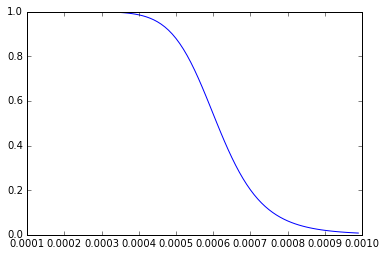

In [60]:
constant = 6.1e-04
exponent = 10
constant_pow_exponent = np.exp(exponent*np.log(constant))

concentration = np.arange(1.0e-4, 1.0e-3, 1.0e-5)
concentration_pow_exponent = np.exp(np.multiply(exponent,np.log(concentration)))

activity = np.divide(constant_pow_exponent,(constant_pow_exponent + concentration_pow_exponent))
plt.plot(concentration,activity)
plt.show()

Likewise, positive regulation is done using the comparable Hill Function,
$$Activity = \frac{X^{n}}{K^{n} + X^{n}}$$.
Positive regulation is indicated in the Boltzmann .dat file with keyword PREGULATION.

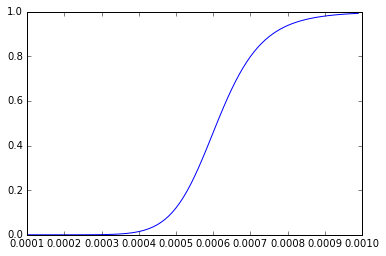

In [61]:
constant = 6.1e-04
exponent = 10
constant_pow_exponent = np.exp(exponent*np.log(constant))

concentration = np.arange(1.0e-4, 1.0e-3, 1.0e-5)
concentration_pow_exponent = np.exp(np.multiply(exponent,np.log(concentration)))

activity = np.divide(concentration_pow_exponent,(constant_pow_exponent + concentration_pow_exponent))
plt.plot(concentration,activity)

## Turning on Regulation and Setting Enzyme Levels
To use regulation in the simulation, this flag must be set in the .in file:

USE_REGULATION 1

If USE_REGULATION is set to 0, then the regulation information in the .dat file will be ignored.

**Reactions** can be turned on (1.0) or off (0.0) by setting the ENZYME_LEVEL feature in the .dat file for a reaction:

USE_ENZYME_LEVELS 1.0 

or

USE_ENZYME_LEVELS 0.0

**In addition, USE_ACTIVITY 1" must be set in the .in file.**

# Models and Simulations

## Model With Regulation
### Run Deterministic Simulation
Uncomment the lines below to run from the notebook.

In [62]:
#args = ("boltzmann", "neurospora_pentose_phos.glycolysis.tca_reg.in")
#
#popen = subprocess.Popen(args, stdout=subprocess.PIPE)
#popen.wait()
#output = popen.stdout.read()
#print(output)

### Derivatives from ODE thermodynamic optimization simulation

(S)-MALATE:CYTOSOL                           0.000000e+00
ORTHOPHOSPHATE:CYTOSOL                       0.000000e+00
PHOSPHOENOLPYRUVATE:CYTOSOL                  0.000000e+00
SEDOHEPTULOSE_7-PHOSPHATE:CYTOSOL            0.000000e+00
(S)-MALATE:GLYOXYSOME                        0.000000e+00
ACETYL-COA:GLYOXYSOME                        0.000000e+00
COA:GLYOXYSOME                               0.000000e+00
GLYOXYLATE:GLYOXYSOME                        0.000000e+00
ISOCITRATE:GLYOXYSOME                        0.000000e+00
SUCCINATE:GLYOXYSOME                         0.000000e+00
ADP:MITOCHONDRIA                             0.000000e+00
ATP:MITOCHONDRIA                             0.000000e+00
CITRATE:MITOCHONDRIA                         0.000000e+00
CO2:MITOCHONDRIA                             0.000000e+00
COA:MITOCHONDRIA                             0.000000e+00
ISOCITRATE:MITOCHONDRIA                      0.000000e+00
NAD+:MITOCHONDRIA                            0.000000e+00
NADH:MITOCHOND

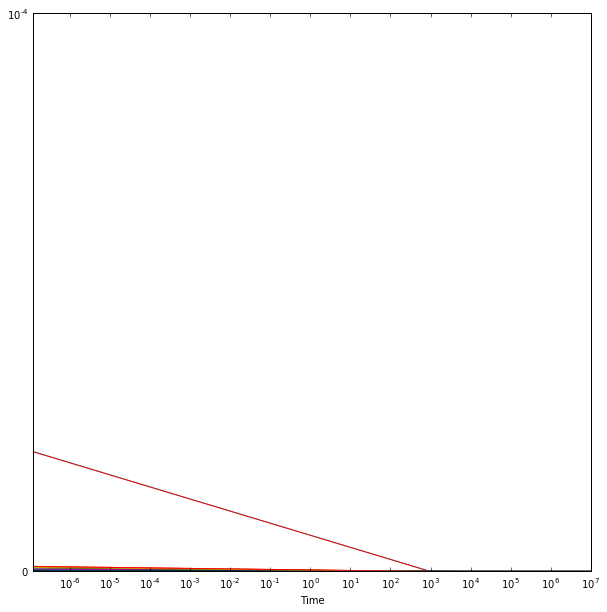

In [63]:
# Read boltzmann stochastic reaction likelihoods
ode_derivatives = pd.read_table('neurospora_pentose_phos.glycolysis.tca.2_reg.ode_dconcs',header=0,index_col=0)

abs_ode_derivatives = np.abs(ode_derivatives)
derivatives = np.abs(ode_derivatives.iloc[-1,:])
temp = derivatives.sort_values()
display(temp)
plt.figure();abs_ode_derivatives.plot(legend=False,logx=True,logy=False,figsize=(10, 10))
plt.yscale('symlog')
#plt.legend(bbox_to_anchor=(1.35, 1.05),bbox_transform=plt.gcf().transFigure)

### Find Active and Variable Metabolites

In [64]:
# Find active reactions
# find chemicals that are in at least one reaction. Includes chemicals that are fixed as well as
# variable ones:
S_active = pd.read_table('neurospora_pentose_phos.glycolysis.tca.2_reg.amat',header=0, index_col = 0, quoting=2)
del S_active['forward reaction']

active_metabolites_idx = (S_active != 0).any(axis=0) #any searches down the column
inactive_metabolites_idx = ~active_metabolites_idx

metabolites_status = pd.read_csv('neurospora_pentose_phos.glycolysis.tca.2_reg.rstrt',delimiter = '\t', index_col=0,skiprows = 2, header=None,quoting=2,usecols=[0,2])
metabolites_status.rename(columns={2:'Value'},inplace=True)
metabolites_status.index = metabolites_status.index.str.strip()
metabolites_status['Variable?'] = metabolites_status == 'V'
metabolites_status.insert(1,'Active?',active_metabolites_idx.values)
del metabolites_status['Value']

metabolites_status['Variable & Active'] = metabolites_status['Variable?']&metabolites_status['Active?']
variable_metabolite_idx = list(metabolites_status[metabolites_status['Variable & Active']==True].index)
variable_metabolite_idx = list(map(str.strip, variable_metabolite_idx))

### Activity-scaled Odds of Reaction from Deterministic Simulation
The activity-scaled thermodynamic odds are read in from the output files, where the odds of a reaction $\alpha$ is $\lambda_{\alpha}\cdot e^{A_{\alpha}/RT} = \lambda_{\alpha}\cdot K_{\alpha}Q_{\alpha}^{-1}$. $A_{\alpha}$ is the reaction affinity for reaction $\alpha$, $\lambda_{\alpha}$ is the activity, $K_{\alpha}$ is the equilibrium constant, and $Q_{\alpha}$ is the reaction quotient.

ME1m                    0.000000
ME2m                    0.000000
CSm                     3.167760
ACONTm                  3.172948
ICDHxm                  2.943128
AKGDm                   2.943136
SUCOASm                 3.172974
SUCD1m                  3.172974
FUMm                    3.172975
MDHm                    3.168494
GAPD                    2.857815
PGK                     3.165480
TPI                     1.428909
MDH                     0.000000
PEP_Carboxylase         0.000000
PPCK                    0.000000
FBA                     1.428909
FBP                     0.000000
TKT2                    0.000000
RPE                     0.000000
Xylulokinase            0.000000
PYK_org                 0.000000
PYK                     2.857850
RPI                     0.000000
TKT1                    0.000000
TALA                    0.000000
PGM                     2.995291
ENO                     2.857887
GND                     0.000000
PGL                     0.000000
HEX1      

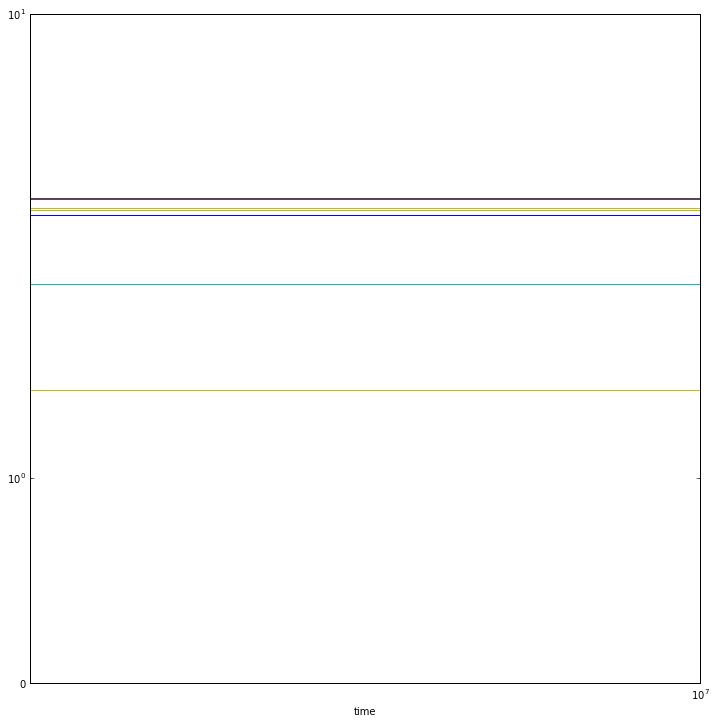

In [65]:
# Read boltzmann ODE reaction likelihoods
ode_likelihoods_timeseries = pd.read_table('neurospora_pentose_phos.glycolysis.tca.2_reg.ode_lklhd',header=1, index_col = 0, quoting=2)

temp = [x for x in ode_likelihoods_timeseries.columns if 'f_' in x]
ode_fwd_likelihoods_timeseries = ode_likelihoods_timeseries[temp]
temp = [x for x in ode_likelihoods_timeseries.columns if 'r_' in x]
ode_rev_likelihoods_timeseries = ode_likelihoods_timeseries[temp]

ode_fwd_likelihoods_timeseries.columns = [x.split("f_")[-1] for x in ode_fwd_likelihoods_timeseries.columns]
ode_rev_likelihoods_timeseries.columns = [x.split("r_")[-1] for x in ode_rev_likelihoods_timeseries.columns]
#fwd_column = ode_likelihoods_timeseries.iloc[:,fwd_column_idx].columns
#rev_column = ode_likelihoods_timeseries.iloc[:,rev_column_idx].columns

plt.figure()
#ode_fwd_likelihoods_timeseries.plot(legend=True,logx=False,figsize=(12, 12))
ode_fwd_likelihoods_timeseries.iloc[-1000:].plot(legend=False,logx=True,figsize=(12, 12))
plt.yscale('symlog')
#plt.legend(bbox_to_anchor=(1.02, 0.9),bbox_transform=plt.gcf().transFigure)
display(ode_fwd_likelihoods_timeseries.iloc[-30:,].mean())

In [66]:
ode_likelihoods_steadystate = pd.DataFrame(data = ode_fwd_likelihoods_timeseries.iloc[-20:].mean(), 
                                           index = ode_fwd_likelihoods_timeseries.columns,
                                          columns =['Forward'])
ode_likelihoods_steadystate['Reverse'] = ode_rev_likelihoods_timeseries.iloc[-20:].mean()
ode_likelihoods_steadystate['For-Rev'] = ode_likelihoods_steadystate['Forward'] - ode_likelihoods_steadystate['Reverse']
ode_likelihoods_steadystate['Rxn Probabilities'] = ode_likelihoods_steadystate['For-Rev']/np.sum(abs(ode_likelihoods_steadystate['For-Rev']))
ode_likelihoods_steadystate                                   

,Forward,Reverse,For-Rev,Rxn Probabilities
ME1m,0.000000,0.000000e+00,0.000000,0.000000
ME2m,0.000000,0.000000e+00,0.000000,0.000000
CSm,3.167760,3.099452e-01,2.857815,0.057143
ACONTm,3.172948,3.151333e-01,2.857815,0.057143
ICDHxm,2.943128,8.531371e-02,2.857814,0.057143
AKGDm,2.943136,8.532161e-02,2.857814,0.057143
SUCOASm,3.172974,3.151601e-01,2.857814,0.057143
SUCD1m,3.172974,3.151600e-01,2.857814,0.057143
FUMm,3.172975,3.151608e-01,2.857814,0.057143
MDHm,3.168494,3.106795e-01,2.857815,0.057143


In [67]:
from escher import Builder

reaction_data = ode_likelihoods_steadystate['For-Rev'].to_dict()
b = Builder(map_name="iMM904.compact_Glycolysis_TCA_PPP.json",reaction_data=reaction_data)
#b.display_in_browser(menu='all')
b.display_in_notebook(menu='zoom')

### Analyze Metabolite Levels from Deterministic Simulation

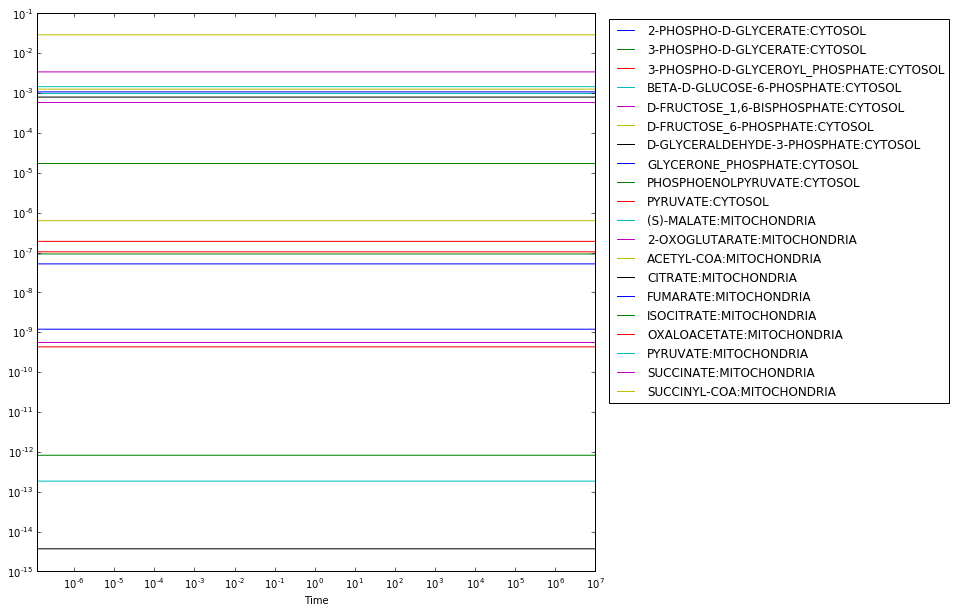

In [68]:
# Read boltzmann stochastic reaction likelihoods
ode_metabolites = pd.read_table('neurospora_pentose_phos.glycolysis.tca.2_reg.ode_concs',header=0,index_col=0)

fig = plt.figure();
plot = ode_metabolites[variable_metabolite_idx].plot(legend=False,logy=True,logx=True,figsize=(10, 10))
fig = plot.get_figure()
fig.savefig('metabolites_regulation.png')
plt.legend(bbox_to_anchor=(1.40, 0.90),bbox_transform=plt.gcf().transFigure)
fig.savefig('metabolites_regulation_legend.png',bbox_inches='tight')
#plt.legend(bbox_to_anchor=(1.35, 0.95),bbox_transform=plt.gcf().transFigure)

In [69]:
ode_metabolites_steadystate = \
  pd.DataFrame(data = ode_metabolites.iloc[-30:,:].mean(),columns=['ODE'])
#display(ode_metabolites_steadystate[ode_metabolites_steadystate['ODE'] > 1.0e-03])
ode_metabolites_steadystate['Counts'] = ode_metabolites_steadystate['ODE']*Concentration2Count
display(ode_metabolites_steadystate.loc[variable_metabolite_idx,'ODE'])
#conc_file = open('steady_state_concentrations.txt', 'w')
#print(ode_metabolites_steadystate,file=conc_file)
##for y in ode_metabolites_steadystate.index:
##    print(y,ode_metabolites.loc[y,:],file=conc_file)
#    #print(reaction_df[y])
#conc_file.close()    

2-PHOSPHO-D-GLYCERATE:CYTOSOL              1.198412e-09
3-PHOSPHO-D-GLYCERATE:CYTOSOL              9.246162e-08
3-PHOSPHO-D-GLYCEROYL_PHOSPHATE:CYTOSOL    1.915114e-07
BETA-D-GLUCOSE-6-PHOSPHATE:CYTOSOL         9.827222e-04
D-FRUCTOSE_1,6-BISPHOSPHATE:CYTOSOL        5.848599e-04
D-FRUCTOSE_6-PHOSPHATE:CYTOSOL             1.262518e-03
D-GLYCERALDEHYDE-3-PHOSPHATE:CYTOSOL       3.700467e-15
GLYCERONE_PHOSPHATE:CYTOSOL                5.215586e-08
PHOSPHOENOLPYRUVATE:CYTOSOL                8.239296e-13
PYRUVATE:CYTOSOL                           4.321473e-10
(S)-MALATE:MITOCHONDRIA                    1.459268e-03
2-OXOGLUTARATE:MITOCHONDRIA                5.568325e-10
ACETYL-COA:MITOCHONDRIA                    6.337797e-07
CITRATE:MITOCHONDRIA                       7.979930e-04
FUMARATE:MITOCHONDRIA                      1.078654e-03
ISOCITRATE:MITOCHONDRIA                    1.720703e-05
OXALOACETATE:MITOCHONDRIA                  1.048364e-07
PYRUVATE:MITOCHONDRIA                      1.849

## Infer Regulated Reactions

In [70]:

ode_metabolites_steadystate['Expected'] = 1.0e-03

S = pd.read_table('neurospora_pentose_phos.glycolysis.tca.2_reg.mat',header=0, index_col = 0, quoting=2)
P = (S>0)
del P['forward reaction']

P = P.astype(np.float64)
#display(R)
product_concentrations = P.multiply(ode_metabolites_steadystate['ODE'],axis=1)
product_concentrations[product_concentrations == 0] = 1
product_concentrations_rxns = pd.DataFrame(data = product_concentrations.T.product(), columns=['ODE'])

expect_product_concentrations = P.multiply(ode_metabolites_steadystate['Expected'],axis=1)
expect_product_concentrations[expect_product_concentrations == 0] = 1
product_concentrations_rxns['Expected'] = (expect_product_concentrations.T).product()

s_regulation = '$\Delta S_{reg}$'
product_concentrations_rxns[s_regulation] = \
    np.log(product_concentrations_rxns['ODE']/product_concentrations_rxns['Expected'])

idx = (ode_likelihoods_steadystate['Reverse'] != 0) & (ode_likelihoods_steadystate['Forward'] != 0) & \
            (product_concentrations_rxns[s_regulation]>1)

display(product_concentrations_rxns[idx])

,ODE,Expected,$\Delta S_{reg}$
reaction title,,,
SUCOASm,4.599911e-08,1.000000e-09,3.828622


## Calculate Rate Constants
For a simple reaction,
\begin{equation}
A + B \rightleftharpoons C + D,
\end{equation}
with forward rate constant $k_{-1}$, reverse rate constant $k_{-1}$ and equilibrium constant $K_{1} = \frac{k_{1}[A][B]}{k_{-1}[C][D]}$, the net flux $J_{1,net}$ is,

\begin{eqnarray}
J_{1,net}& = &\alpha \cdot k_{1}[A][B] - \alpha \cdot k_{-1}[C][D]] \\
         &  = &\alpha \cdot k_{1}[A][B] (1 - K_{-1}Q_{-1}^{-1}), \\
\end{eqnarray}
where $\alpha$ is the activity of the enzyme as a function of regulation at any level.
Solving for the rate constant $k_{1}$,
\begin{equation}
k_{1} = \frac{J_{1, net}}{\alpha \cdot [A][B] (1 - K_{-1}Q_{-1}^{-1})}.
\end{equation}
Since $p_{1,net} \propto J_{1,net}$,
\begin{equation}
k_{1} \propto \frac{p_{1, net}}{\alpha \cdot [A][B] (1 - K_{-1}Q_{-1}^{-1})}.
\end{equation}

The value of $K_{-1}Q_{-1}^{-1}$ should be the instantaneous value equal to $e^{A/RT}$ rather than equal to $e^{-\Delta G/RT}$. That is, in the reaction quotient the concentrations of the products should not be incremented by the stochiometric coefficients. The likelihoods printed out by Boltzmann are such that the product concentrations used to calculate the likelihood are incremented by the stoichiometric coefficients.

*Note that the equations above do not require steady state dynamics.*

### Equalize reaction probabilities

In [71]:
x1 = 0.057143
x2 = 0.028571
delta = 0.000001
idx1 = (ode_likelihoods_steadystate['Rxn Probabilities'] > x1-delta) & \
           (ode_likelihoods_steadystate['Rxn Probabilities'] < x1+delta)   

idx2 = (ode_likelihoods_steadystate['Rxn Probabilities'] > x2-delta) & \
           (ode_likelihoods_steadystate['Rxn Probabilities'] < x2+delta)   
total = idx1.astype(np.float64).sum()*x1 + idx2.astype(np.float64).sum()*x2
display(total)
ode_likelihoods_steadystate['Rxn Probabilities'][idx1] = x1/total
ode_likelihoods_steadystate['Rxn Probabilities'][idx2] = x2/total
display(ode_likelihoods_steadystate)


1.0

,Forward,Reverse,For-Rev,Rxn Probabilities
ME1m,0.000000,0.000000e+00,0.000000,0.000000
ME2m,0.000000,0.000000e+00,0.000000,0.000000
CSm,3.167760,3.099452e-01,2.857815,0.057143
ACONTm,3.172948,3.151333e-01,2.857815,0.057143
ICDHxm,2.943128,8.531371e-02,2.857814,0.057143
AKGDm,2.943136,8.532161e-02,2.857814,0.057143
SUCOASm,3.172974,3.151601e-01,2.857814,0.057143
SUCD1m,3.172974,3.151600e-01,2.857814,0.057143
FUMm,3.172975,3.151608e-01,2.857814,0.057143
MDHm,3.168494,3.106795e-01,2.857815,0.057143


### Calculate the Unregulated Thermodynamic likelihood of the reactions
In order to calculate rate constants, it is necessary to calculate $e^{A_{i}/RT} = K_{i}Q^{-1}_{i}$, where $A$ is the reaction affinity, $K_{i}$ is the equilibrium constant, and $Q_{i}$ is the reaction quotient for reaction $i$.

In [72]:
S = pd.read_table('neurospora_pentose_phos.glycolysis.tca.2_reg.mat',header=0, index_col = 0, quoting=2)
#display(S)
R = (S<0)
P = S>0
del R['forward reaction']
del P['forward reaction']
del S['forward reaction']

R_values = np.abs(S[R])
R_values[R_values.isnull()] = 0
P_values = np.abs(S[P])
P_values[P_values.isnull()] = 0

#S['H2O:CYTOSOL'] =0
#S['H2O:GLYOXYSOME'] =0
#S['H2O:MITOCHONDRIA'] =0

volume_coeff = S.sum(axis=1)

R = R.astype(np.float64)
P = P.astype(np.float64)

steadyState_counts = ode_metabolites_steadystate['ODE']*Concentration2Count

#reactant_counts = ode_metabolites_steadystate['ODE']*Concentration2Count
reactant_counts = R.multiply(steadyState_counts,axis=1)
reactant_counts = reactant_counts.pow(R_values)
reactant_concs =  R.multiply(ode_metabolites_steadystate['ODE'])
reactant_concs = reactant_concs.pow(R_values)
product_counts = P.multiply(steadyState_counts,axis=1)
#display(reactant_counts)
product_concs = P.multiply(ode_metabolites_steadystate['ODE'])

# To the products, increment the current values by the stoichiometric coefficient if comparing to the Boltzman
# likelihoods. But if using the computed likelihoods to calculate rate constants, then don't increment.
product_counts_incremented = product_counts + P.multiply(1)
product_concs_incremented = product_concs + P.multiply(concentration_increment)
# For calculation of the reaction quotient, need to take each concentration to the power of its stoichimetry:
product_counts = product_counts.pow(P_values)
product_counts_incremented = product_counts_incremented.pow(P_values)
product_concs = product_concs.pow(P_values)
product_concs_incremented = product_concs_incremented.pow(P_values)

#Need to increment reactant counts/concs for calculating likelihood of reverse reaction!

# Take the product of counts of all reactants for a reaction
reactant_counts_rxns = (reactant_counts[reactant_counts != 0].T).product()
reactant_concs_rxns = (reactant_concs[reactant_concs != 0].T).product()

# Take the product of counts of all products for a reaction
product_counts_rxns = (product_counts[product_counts != 0].T).product()
product_concs_rxns = (product_concs[product_concs != 0].T).product()
product_counts_incremented_rxns = (product_counts_incremented[product_counts_incremented != 0].T).product()
product_concs_incremented_rxns = (product_concs_incremented[product_concs_incremented != 0].T).product()
#denominator = reactant_counts_rxns.multiply(1-ode_likelihoods_steadystate['Reverse'])

K_eq = pd.read_table('neurospora_pentose_phos.glycolysis.tca.2_reg.dg0ke',header=0, index_col = 0, quoting=2)

# Calculate rate constants
result = pd.DataFrame()
result['Boltzmann Ke'] = K_eq['Ke']
# Notice that Computed L_fwd uses incremented product counts. That is so we can compare to Boltzmann values
# when calculating the activities. That is, these need to use the same formula.
result['Computed L_fwd'] = result['Boltzmann Ke'].multiply(reactant_counts_rxns.divide(product_counts_incremented_rxns))
# In contrast to Computed L_fwd, Computed L_rev does not use incremented product counts when calculating the value.
# This is because we need Computed L_rev to look like the exponent of the reaction affinity, not the free 
# energy change. See markup above.
result['Computed L_rev'] = (product_counts_rxns.divide(reactant_counts_rxns)).divide(result['Boltzmann Ke'])

result['Boltzmann L_fwd'] = ode_likelihoods_steadystate['Forward']
result['Boltzmann L_rev'] = ode_likelihoods_steadystate['Reverse']
result['steady state activity'] = result['Boltzmann L_fwd'].divide(result['Computed L_fwd'])
result['Adjusted L_fwd'] = result['Computed L_fwd'].multiply(result['steady state activity'])
display(result)

,Boltzmann Ke,Computed L_fwd,Computed L_rev,Boltzmann L_fwd,Boltzmann L_rev,steady state activity,Adjusted L_fwd
Rxn_title,,,,,,,
ME1m,5.807996e-02,2.654559e+01,4.194902e-06,0.000000,0.000000e+00,0.000000,0.000000
ME2m,5.733443e-02,1.463953e-02,7.606588e-03,0.000000,0.000000e+00,0.000000,0.000000
CSm,5.326355e+07,3.167758e+00,3.156796e-01,3.167760,3.099452e-01,1.000001,3.167760
ACONTm,6.842451e-02,3.172948e+00,3.151339e-01,3.172948,3.151333e-01,1.000000,3.172948
ICDHxm,7.291438e-01,2.943128e+00,8.532202e-02,2.943128,8.531371e-02,1.000000,2.943128
AKGDm,3.513601e+05,2.943136e+00,3.397611e-01,2.943136,8.532161e-02,1.000000,2.943136
SUCOASm,4.470177e-01,3.172974e+00,3.151612e-01,3.172974,3.151601e-01,1.000000,3.172974
SUCD1m,1.000000e+00,3.172975e+00,3.151606e-01,3.172974,3.151600e-01,1.000000,3.172974
FUMm,4.292596e+00,3.172975e+00,3.151613e-01,3.172975,3.151608e-01,1.000000,3.172975


### Calculate Rate Constants/Parameters
The program Boltzmann can formulate the ODEs for the time dependence of metabolites using either metabolite levels in counts or concentrations. The rate parameters will differ depending on whether counts or concentrations are used. Below both types of rate parameters are calculated, but in the end, the rate parameters using counts are output to a file to be used as input for Boltzmann.

In [73]:
# Use concs or counts below. 
denominator_concs = reactant_concs_rxns.multiply(1-result['Computed L_rev'])
denominator_concs = denominator_concs.multiply(result['steady state activity']) 
denominator_counts = reactant_counts_rxns.multiply(1-result['Computed L_rev'])
denominator_counts = denominator_counts.multiply(result['steady state activity']) #
result['Fwd Rate Constants Counts'] = ode_likelihoods_steadystate['Rxn Probabilities'].divide(denominator_counts)
result['Fwd Rate Constants Concs'] = ode_likelihoods_steadystate['Rxn Probabilities'].divide(denominator_counts)
idx = result['Fwd Rate Constants Counts'].isnull()
result['Fwd Rate Constants Counts'].loc[idx] = 0
result['Fwd Rate Constants Concs'].loc[idx] = 0
result['Rev Rate Constants Counts'] = result['Fwd Rate Constants Counts'].divide(K_eq['Ke'])
# The equilibrium constant in Boltzmann is formulated in terms of counts. If concentrations are used instead
# then the equilibrium constant needs to be multiplied by the Volume of the compartment raised to the 
# negative sum of the stoichiometric coefficients.
result['Rev Rate Constants Concs'] = result['Fwd Rate Constants Concs'].divide(K_eq['Ke']*np.power(VolCell,volume_coeff))
fwd_rates = (result['Fwd Rate Constants Counts'].multiply(reactant_counts_rxns)).multiply(result['steady state activity'])
rev_rates = (result['Rev Rate Constants Counts'].multiply(product_counts_rxns)).multiply(result['steady state activity'])

#fwd_rates = (result['Fwd Rate Constants Concs'].multiply(reactant_concs_rxns)).multiply(result['steady state activity'])
#rev_rates = (result['Rev Rate Constants Concs'].multiply(product_concs_rxns)).multiply(result['steady state activity'])

result['Computed Ke'] = result['Fwd Rate Constants Counts']/result['Rev Rate Constants Counts']
result['Fwd Rate'] = fwd_rates
result['Rev Rate'] = rev_rates
result['Rxn Flux'] = fwd_rates-rev_rates
display(result)

,Boltzmann Ke,Computed L_fwd,Computed L_rev,Boltzmann L_fwd,Boltzmann L_rev,steady state activity,Adjusted L_fwd,Fwd Rate Constants Counts,Fwd Rate Constants Concs,Rev Rate Constants Counts,Rev Rate Constants Concs,Computed Ke,Fwd Rate,Rev Rate,Rxn Flux
Rxn_title,,,,,,,,,,,,,,,
ME1m,5.807996e-02,2.654559e+01,4.194902e-06,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NaN,0.000000,0.000000e+00,0.000000
ME2m,5.733443e-02,1.463953e-02,7.606588e-03,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NaN,0.000000,0.000000e+00,0.000000
CSm,5.326355e+07,3.167758e+00,3.156796e-01,3.167760,3.099452e-01,1.000001,3.167760,3.465382e-06,3.465382e-06,6.506103e-14,6.506103e-29,5.326355e+07,0.083503,2.636029e-02,0.057143
ACONTm,6.842451e-02,3.172948e+00,3.151339e-01,3.172948,3.151333e-01,1.000000,3.172948,1.736230e-07,1.736230e-07,2.537439e-06,2.537439e-06,6.842451e-02,0.083437,2.629375e-02,0.057143
ICDHxm,7.291438e-01,2.943128e+00,8.532202e-02,2.943128,8.531371e-02,1.000000,2.943128,3.850469e-12,3.850469e-12,5.280809e-12,5.280809e+03,7.291438e-01,0.062473,5.330353e-03,0.057143
AKGDm,3.513601e+05,2.943136e+00,3.397611e-01,2.943136,8.532161e-02,1.000000,2.943136,1.955165e-13,1.955165e-13,5.564560e-19,5.564560e-19,3.513601e+05,0.086549,2.940598e-02,0.057143
SUCOASm,4.470177e-01,3.172974e+00,3.151612e-01,3.172974,3.151601e-01,1.000000,3.172974,1.170119e-21,1.170119e-21,2.617611e-21,2.617611e-21,4.470177e-01,0.083440,2.629707e-02,0.057143
SUCD1m,1.000000e+00,3.172975e+00,3.151606e-01,3.172974,3.151600e-01,1.000000,3.172974,6.722371e-14,6.722371e-14,6.722371e-14,6.722371e-14,1.000000e+00,0.083440,2.629701e-02,0.057143
FUMm,4.292596e+00,3.172975e+00,3.151613e-01,3.172975,3.151608e-01,1.000000,3.172975,1.284522e-07,1.284522e-07,2.992414e-08,2.992414e-23,4.292596e+00,0.083440,2.629709e-02,0.057143


### Cutoff for time derivative of concentrations
The simulation program needs to know when a derivative should be considered to be effectively zero. This is determined by the accuracy of the estimates of the rate constants above. We can calculate this accuracy by looking at the difference between the net fluxes of all reactions. This gives a set of m reactions by m reactions differences. Then for each reaction, find the other reaction that has the largest difference. This gives a set of m reactions by 1 differences. Then for each of the reactions, find the largest global difference. This is then the global cutoff for when the derivatives should be considered to be effectively zero.  

In [74]:
diff = pd.DataFrame(columns = result.index)
for col in diff.columns:
   diff[col] = result['Rxn Flux']
#Compare all reaction fluxes against all reaction fluxes
diff = diff - diff.T
# eliminate teh reactions that have large differences because they are on different sides of a branch
diff[diff.abs() > 0.001] =0 
display(diff.max())
display('Max = ',diff.max().max())

Rxn_title
ME1m                    0.000000e+00
ME2m                    0.000000e+00
CSm                     2.775558e-17
ACONTm                  0.000000e+00
ICDHxm                  2.081668e-17
AKGDm                   1.387779e-17
SUCOASm                 1.387779e-17
SUCD1m                  2.081668e-17
FUMm                    2.081668e-17
MDHm                    1.387779e-17
GAPD                    0.000000e+00
PGK                     6.938894e-18
TPI                     0.000000e+00
MDH                     0.000000e+00
PEP_Carboxylase         0.000000e+00
PPCK                    0.000000e+00
FBA                     0.000000e+00
FBP                     0.000000e+00
TKT2                    0.000000e+00
RPE                     0.000000e+00
Xylulokinase            0.000000e+00
PYK_org                 0.000000e+00
PYK                     1.387779e-17
RPI                     0.000000e+00
TKT1                    0.000000e+00
TALA                    0.000000e+00
PGM                     2.08

'Max = '

2.7755575615628914e-17

In [75]:
reaction_df = pd.DataFrame()

filename = '/Users/d3k137/docs/projects/boltzmann/code/06212017/run/pentose_phos.glycolysis.tca/neurospora_pentose_phos.glycolysis.tca.2.dat'
with open(filename,'r') as f:
  for line in f:
     #print(line)
     if re.match('^REACTION', line):
        temp = re.split('\s',line,1)
        rxn_name = temp[1].strip()
        if not rxn_name:            
          print("Error: Reaction name not found:\n", line)
     elif re.match('^COMMENT',line):
        continue
     elif re.match(r'//',line):
        continue
     elif re.match('^#',line):
        continue
     else:
        #print(line)
        rxn_pair = re.split('\s',line,1)
        reaction_df.loc[rxn_pair[0],rxn_name] = rxn_pair[1].strip()
        
     # end if
  # end for loop
# end with loop
display(reaction_df)

,ME1m,ME2m,CSm,ACONTm,ICDHxm,AKGDm,SUCOASm,SUCD1m,FUMm,MDHm,GAPD,PGK,TPI,MDH,PEP_Carboxylase,PPCK,FBA,FBP,TKT2,RPE,Xylulokinase,PYK_org,PYK,RPI,TKT1,TALA,PGM,ENO,GND,PGL,HEX1,PGI,G6PDH2r,PFK,PYRt2m,PDHm,ICL,MAS,PYRDC,ALDD2y,ALCD2X_copy1,LactateDehydrogenase
LEFT,(S)-MALATE + NAD+,(S)-MALATE + NADP+,OXALOACETATE + ACETYL-COA + H2O,CITRATE,ISOCITRATE + NAD+,2-OXOGLUTARATE + COA + NAD+,SUCCINYL-COA + ADP + Orthophosphate,SUCCINATE + redox1,FUMARATE + H2O,(S)-MALATE + NAD+,D-GLYCERALDEHYDE-3-PHOSPHATE + ORTHOPHOSPHATE ...,3-Phospho-D-glyceroyl_phosphate + ADP,Glycerone_phosphate,(S)-MALATE + NAD+,oxaloacetate + orthophosphate,oxaloacetate + ATP,"D-FRUCTOSE_1,6-BISPHOSPHATE",D-FRUCTOSE_6-PHOSPHATE + Orthophosphate,D-FRUCTOSE_6-PHOSPHATE + D-GLYCERALDEHYDE-3-PH...,D-XYLULOSE-5-PHOSPHATE,D-XYLULOSE + ATP,ADP + PHOSPHOENOLPYRUVATE,ADP + PHOSPHOENOLPYRUVATE,D-RIBOSE-5-PHOSPHATE,SEDOHEPTULOSE_7-PHOSPHATE + D-GLYCERALDEHYDE-3...,D-GLYCERALDEHYDE-3-PHOSPHATE + SEDOHEPTULOSE_7...,3-PHOSPHO-D-GLYCERATE,2-PHOSPHO-D-GLYCERATE,NADPH + D-RIBULOSE-5-PHOSPHATE + CO2,6-PHOSPHO-D-GLUCONATE,BETA-D-GLUCOSE + ATP,BETA-D-GLUCOSE-6-PHOSPHATE,BETA-D-GLUCOSE-6-PHOSPHATE + NADP+,D-FRUCTOSE_6-PHOSPHATE + ATP,PYRUVATE,COA + NAD+ + PYRUVATE,isocitrate,acetyl-CoA + glyoxylate + H2O,pyruvate,acetaldehyde + NADP+ + H2O,acetaldehyde + NADH,pyruvate + NADH
RIGHT,pyruvate + NADH + CO2,PYRUVATE + NADPH + CO2,CITRATE + COA,ISOCITRATE,2-OXOGLUTARATE + NADH + CO2,SUCCINYL-COA + CO2 + NADH,SUCCINATE + ATP + COA,FUMARATE + redox2,(S)-MALATE,OXALOACETATE + NADH,3-Phospho-D-glyceroyl_phosphate + NADH,3-PHOSPHO-D-GLYCERATE + ATP,D-GLYCERALDEHYDE-3-PHOSPHATE,OXALOACETATE + NADH,phosphoenolpyruvate + CO2 + H2O,phosphoenolpyruvate + ADP + CO2,Glycerone_phosphate + D-GLYCERALDEHYDE-3-PHOSP...,"H2O + D-FRUCTOSE_1,6-BISPHOSPHATE",D-ERYTHROSE-4-PHOSPHATE + D-XYLULOSE-5-PHOSPHATE,D-RIBULOSE-5-PHOSPHATE,D-XYLULOSE-5-PHOSPHATE + ADP,PYRUVATE + ATP,PYRUVATE + ATP,D-RIBULOSE-5-PHOSPHATE,D-RIBOSE-5-PHOSPHATE + D-XYLULOSE-5-PHOSPHATE,D-FRUCTOSE_6-PHOSPHATE + D-ERYTHROSE-4-PHOSPHATE,2-PHOSPHO-D-GLYCERATE,PHOSPHOENOLPYRUVATE + H2O,NADP+ + 6-PHOSPHO-D-GLUCONATE,"D-Glucono-1,5-lactone_6-phosphate + H2O",BETA-D-GLUCOSE-6-PHOSPHATE + ADP,D-FRUCTOSE_6-PHOSPHATE,"D-Glucono-1,5-lactone_6-phosphate + NADPH","ADP + D-FRUCTOSE_1,6-BISPHOSPHATE",PYRUVATE,ACETYL-COA + CO2 + NADH,glyoxylate + succinate,(S)-MALATE + COA,acetaldehyde + CO2,acetate + NADPH,ethanol + NAD+,lactate + NAD+
LEFT_COMPARTMENT,MITOCHONDRIA,MITOCHONDRIA,MITOCHONDRIA,MITOCHONDRIA,MITOCHONDRIA,MITOCHONDRIA,MITOCHONDRIA,MITOCHONDRIA,MITOCHONDRIA,MITOCHONDRIA,CYTOSOL,CYTOSOL,CYTOSOL,CYTOSOL,CYTOSOL,CYTOSOL,CYTOSOL,CYTOSOL,CYTOSOL,CYTOSOL,CYTOSOL,CYTOSOL,CYTOSOL,CYTOSOL,CYTOSOL,CYTOSOL,CYTOSOL,CYTOSOL,CYTOSOL,CYTOSOL,CYTOSOL,CYTOSOL,CYTOSOL,CYTOSOL,CYTOSOL,MITOCHONDRIA,GLYOXYSOME,GLYOXYSOME,CYTOSOL,CYTOSOL,CYTOSOL,CYTOSOL
RIGHT_COMPARTMENT,MITOCHONDRIA,MITOCHONDRIA,MITOCHONDRIA,MITOCHONDRIA,MITOCHONDRIA,MITOCHONDRIA,MITOCHONDRIA,MITOCHONDRIA,MITOCHONDRIA,MITOCHONDRIA,CYTOSOL,CYTOSOL,CYTOSOL,CYTOSOL,CYTOSOL,CYTOSOL,CYTOSOL,CYTOSOL,CYTOSOL,CYTOSOL,CYTOSOL,CYTOSOL,CYTOSOL,CYTOSOL,CYTOSOL,CYTOSOL,CYTOSOL,CYTOSOL,CYTOSOL,CYTOSOL,CYTOSOL,CYTOSOL,CYTOSOL,CYTOSOL,MITOCHONDRIA,MITOCHONDRIA,GLYOXYSOME,GLYOXYSOME,CYTOSOL,CYTOSOL,CYTOSOL,CYTOSOL
ENZYME_LEVEL,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
PATHWAY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"GLUCONEOGENESIS, GLYCOLYSIS","GLUCONEOGENESIS, GLYCOLYSIS, CALVIN CYCLE","CALVIN CYCLE, GLYCOLYSIS",NaN,GLUCONEOGENSESIS,GLUCONEOGENSESIS,"GLUCONEOGENSESIS, GLYCOLYSIS, CALVIN CYCLE","GLUCONEOGENESIS, CALVIN CYCLE","CALVIN CYCLE, PENTOSE PHOSPHATE PATHWAY, RUBIS...","CALVIN CYCLE, PENTOSE PHOSPHATE PATHWAY, RUBIS...","CALVIN CYCLE, PENTOSE PHOSPHATE PATHWAY, RUBIS...","GLYCOLYSIS, PYRUVATE METABOLISM, RUBISCO SHUNT","GLYCOLYSIS, PYRUVATE METABOLISM, RUBISCO SHUNT","CALVIN CYCLE, P

In [76]:
reaction_file = open('neurospora_pentose_phos.glycolysis.tca.2_rate.dat', 'w')
for y in reaction_df:
    print("REACTION\t",y,file=reaction_file)
    #print(reaction_df[y])
    for x in reaction_df[y].index:
      if pd.notnull(reaction_df.loc[x,y]):
        print(x, reaction_df.loc[x,y],file=reaction_file)
    print("k_FORWARD",result.loc[y,'Fwd Rate Constants Counts'],file=reaction_file)
    print("k_REVERSE",result.loc[y,'Rev Rate Constants Counts'],file=reaction_file)
    print("//",file=reaction_file)
reaction_file.close()    